<a href="https://colab.research.google.com/github/krish-hayagriva/Machine-Learning-Projects/blob/main/Support_vector_Machine_on_biological_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roll no AA.SC.P2MCA2107470

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
pip install sklearn

In [ ]:
frgd = pd.read_excel('/content/drive/My Drive/frg2.xlsx')

In [ ]:
type(frgd)

pandas.core.frame.DataFrame

In [ ]:
frgd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 8  7195 non-null   float64
 1   MFCCs_ 9  7195 non-null   float64
 2   MFCCs_10  7195 non-null   float64
 3   MFCCs_11  7195 non-null   float64
 4   MFCCs_12  7195 non-null   float64
 5   Family    7195 non-null   object 
dtypes: float64(5), object(1)
memory usage: 337.4+ KB


In [ ]:
frgd = frgd.rename({'MFCCs_ 8': 'm8', 'MFCCs_ 9': 'm9','MFCCs_10':'m10','MFCCs_11':'m11','MFCCs_12':'m12','Family':'fm'}, axis='columns')

In [ ]:
frgd['fm'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Leptodactylidae
1           Leptodactylidae
2           Leptodactylidae
3           Leptodactylidae
4           Leptodactylidae
               ...         
7190    Non-Leptodactylidae
7191    Non-Leptodactylidae
7192    Non-Leptodactylidae
7193    Non-Leptodactylidae
7194    Non-Leptodactylidae
Name: fm, Length: 7195, dtype: object>

In [ ]:
frgx = pd.DataFrame(frgd.iloc[:, 0:4])
y = pd.DataFrame(frgd.iloc[:,5])


The base data of features is already between +1 and -1 and hence is standarized . Therefore no further standardization is carried out 

In [ ]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(frgx, y, test_size=0.30, random_state=42)

In [ ]:
frgx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m8      7195 non-null   float64
 1   m9      7195 non-null   float64
 2   m10     7195 non-null   float64
 3   m11     7195 non-null   float64
dtypes: float64(4)
memory usage: 225.0 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036 entries, 2004 to 860
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m8      5036 non-null   float64
 1   m9      5036 non-null   float64
 2   m10     5036 non-null   float64
 3   m11     5036 non-null   float64
dtypes: float64(4)
memory usage: 196.7 KB


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036 entries, 2004 to 860
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fm      5036 non-null   object
dtypes: object(1)
memory usage: 78.7+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 3340 to 2653
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m8      2159 non-null   float64
 1   m9      2159 non-null   float64
 2   m10     2159 non-null   float64
 3   m11     2159 non-null   float64
dtypes: float64(4)
memory usage: 84.3 KB


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 3340 to 2653
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fm      2159 non-null   object
dtypes: object(1)
memory usage: 33.7+ KB


In [ ]:
frgx,y = make_classification(n_features=4, random_state=100)
clf = make_pipeline(LinearSVC(random_state=0, tol=0.0001, C= 1,intercept_scaling =1))
frgTM = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(clf.named_steps['linearsvc'].coef_)

[[-3.46478879  1.90606732 -3.75106338  4.27876521]]


From the co efficents we see that the coeeficients of the first feature is less than 1 while that of the others are >30 but <50. These are the  coeeficients of the linear separator equations

In [ ]:
print(clf.named_steps['linearsvc'].intercept_)

[0.23718199]


In [ ]:
frgTMp = pd.DataFrame(clf.predict(X_train), columns = ['predicted frog type'])
frgTMp['actual'] = y_train.values

In [ ]:
frgTMp

,predicted frog type,actual
0,Leptodactylidae,Leptodactylidae
1,Leptodactylidae,Non-Leptodactylidae
2,Non-Leptodactylidae,Non-Leptodactylidae
3,Leptodactylidae,Leptodactylidae
4,Leptodactylidae,Leptodactylidae
...,...,...
5031,Leptodactylidae,Leptodactylidae
5032,Non-Leptodactylidae,Non-Leptodactylidae
5033,Non-Leptodactylidae,Non-Leptodactylidae
5034,Non-Leptodactylidae,Non-Leptodactylidae


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


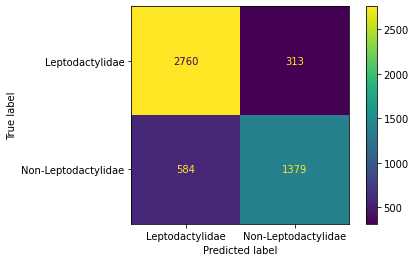

In [ ]:
# performance of trainning model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cf = plot_confusion_matrix(clf,X_train,y_train) 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(frgTMp['actual'],frgTMp['predicted frog type']))

                     precision    recall  f1-score   support

    Leptodactylidae       0.83      0.90      0.86      3073
Non-Leptodactylidae       0.82      0.70      0.75      1963

           accuracy                           0.82      5036
          macro avg       0.82      0.80      0.81      5036
       weighted avg       0.82      0.82      0.82      5036



In [ ]:
frgTEMp = pd.DataFrame(clf.predict(X_test), columns = ['predicted frog type'])

In [ ]:
frgTEMp['actual'] = y_test.values

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


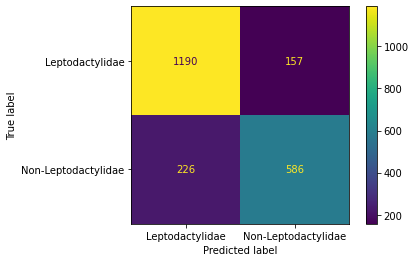

In [ ]:
cf = plot_confusion_matrix(clf,X_test,y_test) 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(frgTEMp['actual'],frgTEMp['predicted frog type']))

                     precision    recall  f1-score   support

    Leptodactylidae       0.84      0.88      0.86      1347
Non-Leptodactylidae       0.79      0.72      0.75       812

           accuracy                           0.82      2159
          macro avg       0.81      0.80      0.81      2159
       weighted avg       0.82      0.82      0.82      2159

